In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
from IPython.display import display as Idisplay, Math as Imath

In [2]:
sm.init_printing()


def display(equations):
    Idisplay(Imath(sm.latex(equations)))

In [3]:
x: sm.Symbol
t: sm.Symbol
h: sm.Symbol
tau: sm.Symbol
u: sm.Function
lm: sm.Symbol
sg: sm.Symbol
x, t, h, tau, lm, sg = sm.symbols('x t h tau lambda sigma')
u = sm.Function('u')(x, t)

a1, a2, a3, a4 = sm.symbols('a_1 a_2 a_3 a_4')

In [4]:
def expansion(f: sm.Function, var: sm.Symbol, delta, n=4) -> sm.Function:
    return sum(delta ** i / sm.factorial(i) * f.diff(var, i) for i in range(n))


def expansion2(f: sm.Function, var1: sm.Symbol, var2: sm.Symbol, delta1, delta2):
    res = expansion(expansion(f, var1, delta1), var2, delta2).expand()
    return (res + sm.O(delta1 ** 4) + sm.O(delta2 ** 4) + sm.O(delta1 ** 2 * delta2 ** 2)
            + sm.O(delta1 * delta2 ** 3) + sm.O(delta1 ** 3 * delta2)).simplify().removeO()


In [5]:
assert expansion2(u, x, t, 0, 0) == u

![](img.png "Title")

$$
U_m^{n+1}=a_1U_{m-1}^n+a_2U_{m+1}^n+a_3U_m^{n-1}+a_4U_{m-2}^{n-1}
$$

In [6]:
expr = sm.Eq(expansion2(u, x, t, 0, tau), a1 * expansion2(u, x, t, -h, 0) + a2 * expansion2(u, x, t, h, 0) \
             + a3 * expansion2(u, x, t, 0, -tau) + a4 * expansion2(u, x, t, -2 * h, -tau))
display(expr)

<IPython.core.display.Math object>

$$
U_t=-\lambda U_x
\\
U_{tt}=-\lambda^2 U_{xx}
\\
U_{ttt}=-\lambda^3 U_{xxxx}
\\
U_{xt}=-\lambda U_{xx}
\\
U_{xtt}=\lambda^2 U_{xxx}
\\
U_{xxt}=-\lambda U_{xxx}
$$

In [7]:
expr = expr.subs(u.diff(t), -lm * u.diff(x)).simplify()
expr = expr.subs(u.diff(t, 2), lm ** 2 * u.diff(x, 2)).simplify()
expr = expr.subs(u.diff(t, 3), -lm ** 3 * u.diff(x, 3)).simplify()
expr = expr.subs(u.diff(x).diff(t), -lm * u.diff(x, 2)).simplify()
expr = expr.subs(u.diff(x).diff(t, 2), lm ** 2 * u.diff(x, 3)).simplify()
expr = expr.subs(u.diff(x, 2).diff(t), -lm * u.diff(x, 3)).simplify()
display(expr)

<IPython.core.display.Math object>

In [8]:
expr2 = expr.lhs - expr.rhs
expr2 = sm.factor(expr2).collect(u)
display(expr2)

<IPython.core.display.Math object>

In [9]:
system = [
    sm.Eq(expr2.coeff(u), 0),
    sm.Eq(expr2.coeff(u.diff(x)) / h, 0).expand().subs(lm * tau / h, sg),
    sm.Eq(expr2.coeff(u.diff(x, 2)) * 2 / h ** 2, 0).expand().subs(lm * tau / h, sg),
    sm.Eq(expr2.coeff(u.diff(x, 3)) * 6 / h ** 3, 0).expand().subs(lm * tau / h, sg)
]

In [10]:
for i in system:
    display(sm.Eq(i.lhs.collect([a1, a2, a3, a4]).simplify(), 0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Первый порядок - первые два уравнения

In [11]:
system1 = sm.solve(system[:2], [a1, a2])

In [22]:
for i in [*system1.values(), a3, a4]:
    display(i.collect((a3, a4)) >= 0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Второй порядок - первые три уравнения

In [24]:
system2 = sm.solve(system[:3], [a1, a2, a3])
for i, j in system2.items():
    display(sm.Eq(i, j).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Третий порядок - все уравнения

In [15]:
system3 = sm.solve(system, [a1, a2, a3, a4])
for i, j in system3.items():
    display(sm.Eq(i, j).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
sigma = 0.25

Вершины четырёхугольника в координатах a_4, a_3

In [27]:
display(system1[a1].subs(sg, sigma).nsimplify() >= 0)
display(system1[a2].subs(sg, sigma).nsimplify() >= 0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
display(sm.Eq(a3, sm.solve(sm.Eq(system1[a1].subs(sg, sigma), 0), a3)[0].nsimplify()))
display(sm.Eq(a3,sm.solve(sm.Eq(system1[a2].subs(sg, sigma), 0), a3)[0].nsimplify()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
A = (sm.solve(sm.Eq(system1[a1].subs(a3, 0).subs(sg, sigma), 0), a4)[0].nsimplify(), 0)
B = (0, sm.solve(sm.Eq(system1[a1].subs(a4, 0).subs(sg, sigma), 0), a3)[0].nsimplify())
C = (sm.solve(sm.Eq(system1[a2].subs(a3, 0).subs(sg, sigma), 0), a4)[0].nsimplify(), 0)
D = (0, sm.solve(sm.Eq(system1[a2].subs(a4, 0).subs(sg, sigma), 0), a3)[0].nsimplify())
display(A)
display(B)
display(C)
display(D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

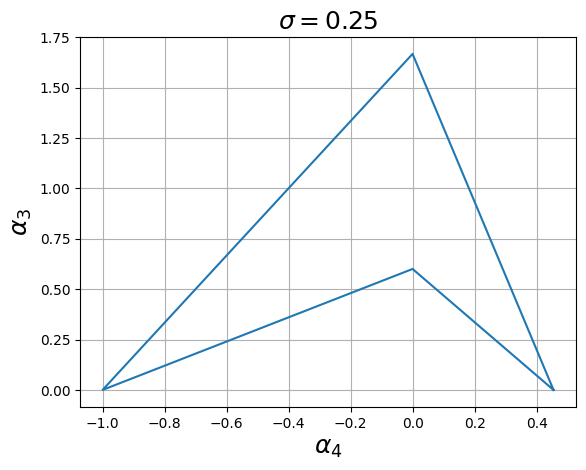

In [40]:
polygon = [A, B, C, D, A]
xs, ys = zip(*polygon)
plt.figure()
plt.plot(xs, ys)

xx = np.linspace(-1.5, 1.5, 100)
# yy =

plt.grid()
ax = plt.gca()
ax.set_xlabel(r'$\alpha_4$', fontsize=18)
ax.set_ylabel(r'$\alpha_3$', fontsize=18)
ax.set_title(r'$\sigma=0.25$', fontsize=18)

plt.show()

In [ ]:
xx = np.linspace(0, 1, 100)
axis_xx = np.linspace(-1, 1, 100)
line1 = np.array([max(-7 * x + 5, 0) / 9 for x in xx])
line2 = np.array([max(-3 * x + 1, 0) / 5 for x in xx])
line3 = np.array([(-21 * x + 5) / 45 for x in axis_xx])

plt.plot(xx, line1, color='r')
plt.plot(xx, line2, color='r')
plt.plot(axis_xx, line3, color='g')
plt.plot(axis_xx, [0 for x in axis_xx], color='black')
plt.plot([0 for x in axis_xx], [x for x in axis_xx], color='black')
plt.grid()

ax = plt.gca()
ax.fill_between(xx, line2, line1, where=(xx >= 0))
ax.set_xlim(-0.5, 1)
ax.set_ylim(-0.5, 1)
ax.set_xlabel(r'$\alpha_4$', fontsize=18)
ax.set_ylabel(r'$\alpha_1$', fontsize=18)
ax.set_title(r'$\sigma=0.25$', fontsize=18)

plt.plot(1 / 3, 0, 'or')
ax.annotate('A1', [1 / 3, 0], fontsize=16)

plt.plot(0, 1 / 5, 'or')
ax.annotate('A2', [0, 1 / 5], fontsize=16)

plt.plot(0, 5 / 9, 'or')
ax.annotate('A3', [0, 5 / 9], fontsize=16)

plt.plot(5 / 7, 0, 'or')
ax.annotate('A4', [5 / 7, 0], fontsize=16)

plt.plot(10 / 21, -7 / 63, 'or')
ax.annotate('C', [10 / 21, -1 / 9], fontsize=16)

plt.plot(130 / 411, -5 / 137, 'or')
ax.annotate('B1', [130 / 411, -5 / 137], fontsize=16)

plt.plot(1 / 4, -1 / 180, 'or')
ax.annotate('B2', [1 / 4, -1 / 180], fontsize=16)

plt.plot(0.6, -38 / 225, 'or')
ax.annotate('B3', [0.6, -38 / 225], fontsize=16)

fig = plt.gcf()
fig.set_size_inches(16, 10)